In [1]:
'''Reading the segmented data'''
import pickle
import gzip
import shutil
import os

def load_pickle_from_parts(parts_dir):
    # Combine the parts into a single compressed file
    combined_path = os.path.join(parts_dir, 'combined_compressed_pickle.gz')
    with open(combined_path, 'wb') as combined_file:
        part_num = 0
        while True:
            part_path = os.path.join(parts_dir, f'segmented_data_part_{part_num:03d}')
            if not os.path.exists(part_path):
                break
            with open(part_path, 'rb') as part_file:
                shutil.copyfileobj(part_file, combined_file)
            part_num += 1
    
    # Decompress the combined file and load the pickle data
    with gzip.open(combined_path, 'rb') as f_in:
        data = pickle.load(f_in)
    
    # Optionally remove the combined file after loading
    os.remove(combined_path)
    
    return data

# Example usage
current_dir = os.getcwd()  # Use the current working directory
parent_dir = os.path.dirname(current_dir)
parts_dir = os.path.join(parent_dir, 'data')
segmented_data = load_pickle_from_parts(parts_dir)


In [2]:
'''Reading the features'''

import pickle
import gzip
import shutil
import os

def load_pickle_from_parts(parts_dir):
    # Combine the parts into a single compressed file
    combined_path = os.path.join(parts_dir, 'features_20s.gz')
    with open(combined_path, 'wb') as combined_file:
        part_num = 0
        while True:
            part_path = os.path.join(parts_dir, f'features_20s_part_{part_num:03d}')
            if not os.path.exists(part_path):
                break
            with open(part_path, 'rb') as part_file:
                shutil.copyfileobj(part_file, combined_file)
            part_num += 1
    
    # Decompress the combined file and load the pickle data
    with gzip.open(combined_path, 'rb') as f_in:
        data = pickle.load(f_in)
    
    # Optionally remove the combined file after loading
    os.remove(combined_path)
    
    return data

# Example usage
current_dir = os.getcwd()  # Use the current working directory
parent_dir = os.path.dirname(current_dir)
parts_dir = os.path.join(parent_dir, 'data')
data_df = load_pickle_from_parts(parts_dir)


In [2]:
"""
Libraries
"""

import os
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt, medfilt
import matplotlib.pyplot as plt
import pickle

current_dir = os.getcwd()
intermediate_data_dir = os.path.join(current_dir, 'data', 'intermediate')

# Assuming 'intermediate_data_dir' contains the directory path where 'segmented_data_sync.pickle' is located
file_name = os.path.join(intermediate_data_dir, 'segmented_data_sync.pickle')

with open(file_name, 'rb') as f:
    data_sync = pickle.load(f)


# Assuming 'intermediate_data_dir' contains the directory path where 'segmented_data_sync.pickle' is located
file_name = os.path.join(intermediate_data_dir, 'segmented_data.pickle')

with open(file_name, 'rb') as f:
    data = pickle.load(f)

In [ ]:
'''Checking the sync events for all modalities of all devices'''

for subject in data_sync.keys():
    for device in data_sync[subject][12].keys():
        signal = data_sync[subject][12][device]
        try:
            del signal['ang_vel_x']
            del signal['ang_vel_y']
            del signal['ang_vel_z']
        except:
            pass
        signal.plot()
        # Get the current figure
        fig = plt.gcf()
        # Set the title of the figure
        fig.suptitle(f'Initial Sync for {subject} {device}', fontsize=12)
        # Show the plot
        plt.show()

        signal = data_sync[subject][13][device]
        try:
            del signal['ang_vel_x']
            del signal['ang_vel_y']
            del signal['ang_vel_z']
        except:
            pass
        
        signal.plot()
        # Get the current figure
        fig = plt.gcf()
        # Set the title of the figure
        fig.suptitle(f'Final Sync for {subject} {device}', fontsize=12)
        # Show the plot
        plt.show()

In [1]:
'''Checking the adls'''


'corsano_wrist'
'cosinuss_ear'
'sensomative_back'
'sensomative_bottom'
'vivalink_patch'
'zurichmove_wheel'

device = 'corsano_wrist'

for adl in range(12):
    for subject in data.keys():
        if subject in ['sensei-997']:
            if adl in data[subject].keys():
                if device in data[subject][adl].keys():
                    signal = data[subject][adl][device]
                    # signal = data[subject][adl][device]['ecg']
                    signal.plot()
                    # Get the current figure
                    fig = plt.gcf()
                    # Set the title of the figure
                    fig.suptitle(f'Data for {subject} {adl} {device}', fontsize=12)
                    # Show the plot
                    plt.show()

In [37]:
# data['sensei-223'][8]['corsano_wrist'].iloc[:6850, :].plot()

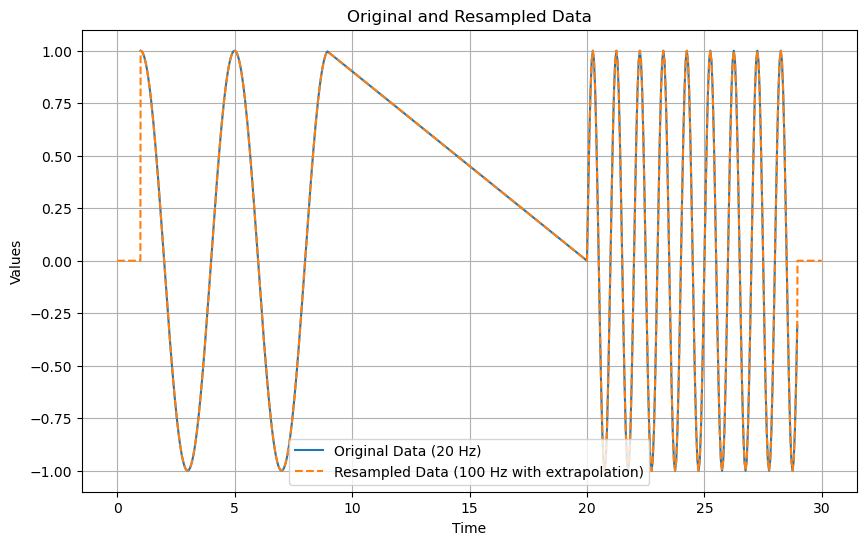

In [8]:
'''Trying different interpolation methods'''

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Generating example data (time and values)
time_original_1 = np.arange(1, 9, 1/20)  # Original time array (20 Hz)
values_original_1 = np.sin(0.5 * np.pi * time_original_1)  # Example values

time_original_2 = np.arange(20, 29, 1/20)  # Original time array (20 Hz)
values_original_2 = np.sin(2 * np.pi * time_original_2)  # Example values

# Combine the two sets of example data together
combined_time = np.concatenate((time_original_1, time_original_2))
combined_values = np.concatenate((values_original_1, values_original_2))


# Define new time array with larger time interval (100 Hz)
time_new = np.arange(0, 30, 1/100)  # New time array (100 Hz)

# Use interp1d to interpolate and extrapolate the data
interpolator = interp1d(combined_time, combined_values, kind='slinear', fill_value=(0, 0), bounds_error=False)

# Interpolate/extrapolate the values to the new time array
values_new = interpolator(time_new)

# Plot the original and resampled data
plt.figure(figsize=(10, 6))
plt.plot(combined_time, combined_values, label='Original Data (20 Hz)', marker='', linestyle='-')
plt.plot(time_new, values_new, label='Resampled Data (100 Hz with extrapolation)', marker='', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Original and Resampled Data')
plt.legend()
plt.grid(True)
plt.show()


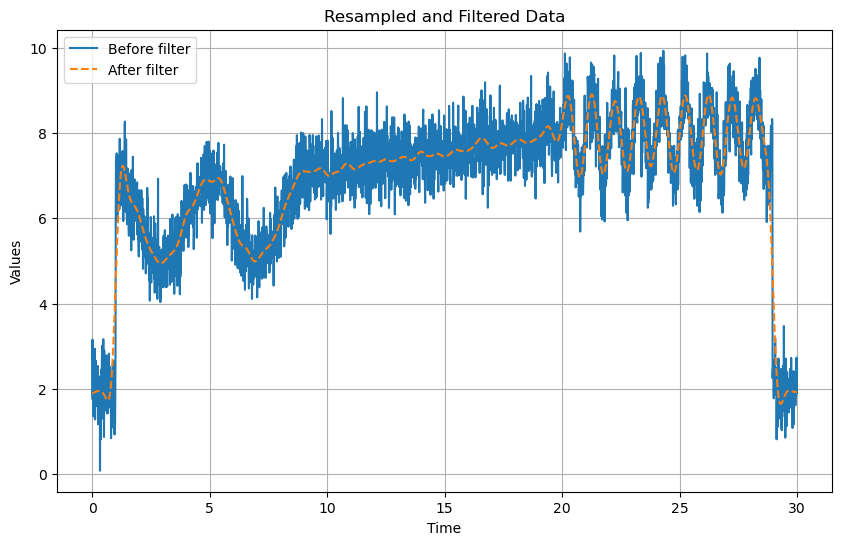

In [7]:
'''Trying different low pass filters'''

import numpy as np
from scipy.signal import butter,filtfilt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Generating example data (time and values)
time_original_1 = np.arange(1, 9, 1/20)  # Original time array (20 Hz)
values_original_1 = np.sin(0.5 * np.pi * time_original_1) + 4  # Example values

time_original_2 = np.arange(20, 29, 1/20)  # Original time array (20 Hz)
values_original_2 = np.sin(2 * np.pi * time_original_2) + 6 # Example values

# Combine the two sets of example data together
combined_time = np.concatenate((time_original_1, time_original_2))
combined_values = np.concatenate((values_original_1, values_original_2))

# Define new time array with larger time interval (100 Hz)
time_resampled = np.arange(0, 30, 1/100)  # New time array (100 Hz)

# Use interp1d to interpolate and extrapolate the data
interpolator = interp1d(combined_time, combined_values, kind='slinear', fill_value=(0, 0), bounds_error=False)

# Interpolate/extrapolate the values to the new time array
values_resampled = interpolator(time_resampled) + 2 + np.random.normal(0, 0.5, len(time_resampled))


def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

values_filtered = butter_lowpass_filter(values_resampled, 1.5, 100, 3)


# Plot the original and resampled data
plt.figure(figsize=(10, 6))
plt.plot(time_resampled, values_resampled, label='Before filter', marker='', linestyle='-')
plt.plot(time_resampled, values_filtered, label='After filter', marker='', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Resampled and Filtered Data')
plt.legend()
plt.grid(True)
plt.show()


# Feature Extraction
Non-parallelized feature extraction


In [10]:
import os
import pandas as pd
import pickle
import yaml
from StatisticalFeatures import StatisticalFeatures
from SpectralFeatures import SpectralFeatures
from TimeFrequencyFeatures import TimeFrequencyFeatures
from EcgFeatures import EcgFeatures
import concurrent.futures
import warnings


"""
   Parameters
"""
# Muting warnings
warnings.filterwarnings("ignore")

# Load parameters from the yaml file
with open('parameters.yaml', 'r') as f:
    params = yaml.safe_load(f)
seed_number = params['seed_number']
fs = params['upsample_freq']
window_size = params['window_size']
overlap = params['overlap']
f_bands = params['f_bands']

# Converting window size and overlap to number of samples
window_size = window_size * fs
overlap = overlap * window_size
step_size = window_size - overlap

# Get the current directory
current_dir = os.getcwd()
# The directory for the intermediate data
intermediate_data_dir = os.path.join(current_dir, 'data', 'intermediate')
# Loading the segmented data
file_name = os.path.join(intermediate_data_dir, 'segmented_data.pickle')
with open(file_name, 'rb') as f:
    segmented_data = pickle.load(f)

# Defining feature generation objects
stat_feat_extractor = StatisticalFeatures(window_size=window_size)
freq_feat_extractor = SpectralFeatures(fs=fs, f_bands=f_bands)
time_freq_feat_extractor = TimeFrequencyFeatures(window_size=window_size)
ecg_feat_extractor = EcgFeatures(fs=fs)

# Defining a df_features with headers for devices, features, and labels
subject = list(segmented_data.keys())[0]
activity = list(segmented_data[subject].keys())[0]
devices = sorted(list(segmented_data[subject][activity].keys()))
# A dict for storing the 2 layer headers
headers = {}
for device in devices:
    # A list for storing feature names
    feats_names = []
    df_signals = segmented_data[subject][activity][device]
    for column in sorted(df_signals.columns):
        signal = df_signals.iloc[0:window_size][column].values
        # signal_der1 = np.gradient(signal)
        # signal_der2 = np.gradient(signal_der1)
        signal_name = f"{device}_{column}"
        if column != 'ecg':
            # Extracting the statistical features per windowed signal and its derivatives
            _, stat_feats_names = stat_feat_extractor.calculate_statistical_features(signal, signal_name)
            feats_names.extend(stat_feats_names)
            # _, stat_feats_der1_names = stat_feat_extractor.calculate_statistical_features(signal_der1, signal_name + "_der1")
            # feats_names.extend(stat_feats_der1_names)
            # _, stat_feats_der2_names = stat_feat_extractor.calculate_statistical_features(signal_der2, signal_name + "_der2")
            # feats_names.extend(stat_feats_der2_names)
            # Extracting the spectral features per windowed signal
            _, freq_feats_names = freq_feat_extractor.calculate_frequency_features(signal, signal_name)
            feats_names.extend(freq_feats_names)
            # Extracting time-freq features per windowed signal
            _, time_freq_feats_names = time_freq_feat_extractor.calculate_time_frequency_features(signal, signal_name)
            feats_names.extend(time_freq_feats_names)
        if column == 'ecg':
            # Extracting the HR-specific features per windowed signal
            _, ecg_feats_names = ecg_feat_extractor.calculate_ecg_features(signal, signal_name)
            feats_names.extend(ecg_feats_names)
    headers[device] = feats_names
headers['label'] = ['label']
df_columns = pd.MultiIndex.from_tuples([(device, feat) for device, feats in headers.items() for feat in feats])

if __name__ == '__main__':
    features = {}
    subject_activity_pairs = [(subject, activity) for subject in segmented_data.keys() for activity in segmented_data[subject].keys()]
    subject_activity_pairs = [(subject, activity) for subject in list(segmented_data.keys())[0:2] for activity in list(segmented_data[subject].keys())[0:2]]


    for subject in list(segmented_data.keys()):
        for activity in list(segmented_data[subject].keys()):
            df_features = pd.DataFrame(columns=df_columns)
            df_len = len(segmented_data[subject][activity][devices[0]])
            num_windows = int((df_len - overlap) // step_size)
            for i_window in range(num_windows):
                start_idx = int(i_window * step_size)
                end_idx = int(start_idx + window_size)
                # With the initial corsano orientation
                # Storing features and label
                values = []
                for device in devices:
                    df_signals = segmented_data[subject][activity][device]
                    for column in sorted(df_signals.columns):
                        signal = df_signals.iloc[start_idx:end_idx][column].values
                        # signal_der1 = np.gradient(signal)
                        # signal_der2 = np.gradient(signal_der1)
                        signal_name = f"{device}_{column}"
                        if column != 'ecg':
                            stat_feats, _ = stat_feat_extractor.calculate_statistical_features(signal, signal_name)
                            values.extend(stat_feats)
                            # stat_feats_der1, _ = stat_feat_extractor.calculate_statistical_features(signal_der1, signal_name + "_der1")
                            # values.extend(stat_feats_der1)
                            # stat_feats_der2, _ = stat_feat_extractor.calculate_statistical_features(signal_der2, signal_name + "_der2")
                            # values.extend(stat_feats_der2)
                            freq_feats, freq_feats_names = freq_feat_extractor.calculate_frequency_features(signal, signal_name)
                            values.extend(freq_feats)
                            time_freq_feats, time_freq_feats_names = time_freq_feat_extractor.calculate_time_frequency_features(signal, signal_name)
                            values.extend(time_freq_feats)
                        if column == 'ecg':
                            ecg_feats, ecg_feats_names = ecg_feat_extractor.calculate_ecg_features(signal, signal_name)
                            values.extend(ecg_feats)
                values.extend([int(activity)])
                df_features.loc[len(df_features)] = values

                # With the rotated corsano orientation
                # Storing features and label
                values = []
                for device in sorted(devices):
                    df_signals = segmented_data[subject][activity][device]
                    for column in sorted(df_signals.columns):
                        signal = df_signals.iloc[start_idx:end_idx][column].values
                        # signal_der1 = np.gradient(signal)
                        # signal_der2 = np.gradient(signal_der1)
                        signal_name = f"{device}_{column}"
                        if signal_name in ["corsano_wrist_acc_x", "corsano_wrist_acc_y"]:
                            signal = -signal
                        if column != 'ecg':
                            stat_feats, _ = stat_feat_extractor.calculate_statistical_features(signal, signal_name)
                            values.extend(stat_feats)
                            # stat_feats_der1, _ = stat_feat_extractor.calculate_statistical_features(signal_der1, signal_name + "_der1")
                            # values.extend(stat_feats_der1)
                            # stat_feats_der2, _ = stat_feat_extractor.calculate_statistical_features(signal_der2, signal_name + "_der2")
                            # values.extend(stat_feats_der2)
                            freq_feats, _ = freq_feat_extractor.calculate_frequency_features(signal, signal_name)
                            values.extend(freq_feats)
                            time_freq_feats, _ = time_freq_feat_extractor.calculate_time_frequency_features(
                                signal, signal_name)
                            values.extend(time_freq_feats)
                        if column == 'ecg':
                            ecg_feats, _ = ecg_feat_extractor.calculate_ecg_features(signal, signal_name)
                            values.extend(ecg_feats)
                values.extend([int(activity)])
                df_features.loc[len(df_features)] = values
            if subject not in features:
                features[subject] = []
            features[subject].append(df_features)
    for subject in features.keys():
        features[subject] = pd.concat(features[subject], axis=0, ignore_index=True)

    # Save features for last subject
    file_name = os.path.join(intermediate_data_dir, f'features_{int(window_size // fs)}.pkl')
    with open(file_name, 'wb') as f:
        pickle.dump(features, f)


Learning

In [8]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [1]:
'''Libraries'''

import warnings
import numpy as np
import pandas as pd
import random
import pickle
import os
import itertools
import yaml
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
import cupy as cp
import cudf
import time
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score
from scipy.stats import norm
import scipy as sp
import math
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.base import BaseEstimator, clone
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import VotingClassifier
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
from pymrmre import mrmr


In [2]:
'''Loading the data (simple)'''

'''Parameters'''
# Specify the window size
window_size = '20'

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Open the file for reading in binary mode ('rb')
with open(os.path.join('data', 'intermediate', 'features_' + window_size + '.pkl'), 'rb') as f:
    # Load the data using pickle.load()
    data_dict = pickle.load(f)

# Converting the dict data to df
dfs = []
subjects = []
for i_subject, subject in enumerate(data_dict.keys()):
    df1 = data_dict[subject]['corsano_wrist']
    df2 = data_dict[subject]['cosinuss_ear']
    df3 = data_dict[subject]['sensomative_back']
    df4 = data_dict[subject]['sensomative_bottom']
    df5 = data_dict[subject]['vivalink_patch']
    df6 = data_dict[subject]['zurichmove_wheel']
    df7 = data_dict[subject]['label']
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=1)
    df['subject'] = i_subject
    subjects.append(subject)
    dfs.append(df)
data_df = pd.concat(dfs)

# Name of the devices to include in the pipeline
devices = [
    'corsano_wrist',
    'cosinuss_ear',
    'sensomative_back',
    'sensomative_bottom',
    'vivalink_patch',
    'zurichmove_wheel'
]

# Load parameters from the yaml file
with open('parameters.yaml', 'r') as f:
    params = yaml.safe_load(f)

# Accessing the parameters
seed_number = params['seed_number']
upsample_freq = params['upsample_freq']
activities_label_mapping = params['activities_label_mapping']

'''Converting the dataframe to float32 except for the 'label' and 'subject' columns'''
data_df = data_df.astype('float32')
data_df[['label', 'subject']] = data_df[['label', 'subject']].astype(int)

'''Drop columns containing inf and nan values'''
data_df = data_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='any')

'''Updating the list of features for each device'''
device_columns = []
for device in devices:
    columns = []
    for column in data_df.columns:
        if device in column:
            columns.append(column)
    device_columns.append(columns)

# Convert the pandas df to cudf
# data_df = cudf.DataFrame.from_pandas(data_df)

# Reporting the data imbalance
X = np.array(data_df.drop(['label', 'subject'], axis=1, inplace=False))
y = np.array(data_df['label'])
subjects = np.array(data_df['subject'])
# Get unique classes and their counts
classes, counts = np.unique(y, return_counts=True)
# Create a report table
report_table = np.vstack((classes, counts)).T
print("Class | Count")
print("-------------")
for row in report_table:
    print(f"{row[0]:<5} | {row[1]:<5}")


/home/ejtehadi_m/miniconda3/envs/rapids-24.02/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:170: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


Class | Count
-------------
0     | 3646 
1     | 1760 
2     | 1022 
3     | 2018 
4     | 1786 
5     | 2524 
6     | 2246 
7     | 1618 
8     | 1534 
9     | 2494 
10    | 1126 
11    | 1398 


In [5]:
class ResampledXGBClassifier(BaseEstimator):
    
    def __init__(
        self,
        n_estimators=5,
        base_scaler=RobustScaler(),
        random_state=0,
        feature_names=[],
        # mrmr parameters
        mrmr_fixed_features=[],
        mrmr_category_features=[],
        mrmr_solution_length=500,
        mrmr_solution_count=1,
        # xgb parameters
        xgb_verbosity=0, # Different from the defaults
        xgb_booster='gbtree',
        xgb_learning_rate=0.3,
        xgb_gamma=0,
        xgb_max_depth=6,
        xgb_min_child_weight=1,
        xgb_max_delta_step=0,
        xgb_subsample=1,
        xgb_sampling_method='uniform',
        xgb_reg_lambda=1,
        xgb_alpha=0,
        xgb_tree_method='hist',
        xgb_grow_policy='depthwise',
        xgb_max_leaves=0,
        xgb_max_bin=256,
        xgb_num_parallel_tree=1,
        xgb_device='cuda',
        xgb_use_rmm='true',
        xgb_n_estimators=100,
        xgb_objective='multi:softprob', # Different from the defaults
        xgb_eval_metric='auc' # Different from the defaults
    ):
    
        self._estimator_type = "classifier"
        self.classes_ = None
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.feature_names = feature_names

        self.base_scaler = base_scaler

        self.mrmr_fixed_features = mrmr_fixed_features
        self.mrmr_category_features = mrmr_category_features
        self.mrmr_solution_length = mrmr_solution_length
        self.mrmr_solution_count = mrmr_solution_count
        self.mrmr_selected_features = []
        self.mrmr_selected_features_indices = []

        self.xgb_verbosity = xgb_verbosity
        self.xgb_booster = xgb_booster
        self.xgb_learning_rate = xgb_learning_rate
        self.xgb_gamma = xgb_gamma
        self.xgb_max_depth = xgb_max_depth
        self.xgb_min_child_weight = xgb_min_child_weight
        self.xgb_max_delta_step = xgb_max_delta_step
        self.xgb_subsample = xgb_subsample
        self.xgb_sampling_method = xgb_sampling_method
        self.xgb_reg_lambda = xgb_reg_lambda
        self.xgb_alpha = xgb_alpha
        self.xgb_tree_method = xgb_tree_method
        self.xgb_grow_policy = xgb_grow_policy
        self.xgb_max_leaves = xgb_max_leaves
        self.xgb_max_bin = xgb_max_bin
        self.xgb_num_parallel_tree = xgb_num_parallel_tree
        self.xgb_device = xgb_device
        self.xgb_use_rmm = xgb_use_rmm
        self.xgb_n_estimators = xgb_n_estimators
        self.xgb_objective = xgb_objective
        self.xgb_eval_metric = xgb_eval_metric

        # Creating the base estimator
        self.base_estimator = XGBClassifier(
            verbosity=self.xgb_verbosity,
            booster=self.xgb_booster,
            learning_rate=self.xgb_learning_rate,
            gamma=self.xgb_gamma,
            max_depth=self.xgb_max_depth,
            min_child_weight=self.xgb_min_child_weight,
            max_delta_step=self.xgb_max_delta_step,
            subsample=self.xgb_subsample,
            sampling_method=self.xgb_sampling_method,
            reg_lambda=self.xgb_reg_lambda,
            alpha=self.xgb_alpha,
            tree_method=self.xgb_tree_method,
            grow_policy=self.xgb_grow_policy,
            max_leaves=self.xgb_max_leaves,
            max_bin=self.xgb_max_bin,
            num_parallel_tree=self.xgb_num_parallel_tree,
            device=self.xgb_device,
            use_rmm=self.xgb_use_rmm,
            random_state=self.random_state,
            n_estimators=self.xgb_n_estimators,
            objective=self.xgb_objective,
            eval_metric=self.xgb_eval_metric,
        )
        self.estimators = self._generate_estimators()
        self.estimator = VotingClassifier(self.estimators, voting="soft")

    def _generate_estimators(self):
        estimators = []
        for i in range(self.n_estimators):
            est = clone(self.base_estimator)
            est.random_state = i + self.random_state
            pipe = make_imb_pipeline(
                RandomUnderSampler(random_state=i, replacement=False),
                est
            )
            estimators.append((f"est_{i}", pipe))
        return estimators


    def fit(self, X, y, sample_weight=None):
        # Scaling        
        X_t = self.base_scaler.fit_transform(X)
        # Feature selection
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=FutureWarning)
            self.mrmr_selected_features = mrmr.mrmr_ensemble(
                features=pd.DataFrame(X_t, columns=self.feature_names),
                targets=pd.DataFrame(y, columns=['label']),
                fixed_features=self.mrmr_fixed_features,
                category_features=self.mrmr_category_features,
                solution_length=self.mrmr_solution_length,
                solution_count=self.mrmr_solution_count
            )['label'][0]
            self.mrmr_selected_features_indices = [self.feature_names.index(item) for item in self.mrmr_selected_features]
            X_t = X_t[:, self.mrmr_selected_features_indices]
            # Classification
            self.estimator.fit(X_t, y, sample_weight)
            self.classes_ = self.estimator.classes_
        return self.estimator
    
    def predict(self, X):
        X_t = self.base_scaler.transform(X)
        X_t = X_t[:, self.mrmr_selected_features_indices]
        return self.estimator.predict(X_t)
    
    def predict_proba(self, X):
        X_t = self.base_scaler.transform(X)
        X_t = X_t[:, self.mrmr_selected_features_indices]
        return self.estimator.predict_proba(X_t)
    
    def classes_(self):
        if self.estimator:
            return self.estimator.classes_

    def set_params(self, **params):
        if not params:
            return self
        for key, value in params.items():
            if hasattr(self, key):
                setattr(self, key, value)
            if key.startswith('xgb_'):
                key_xgb = key[len('xgb_'):]  # Strip the 'xgb_' prefix
                setattr(self.base_estimator, key_xgb, value)  # Update parameters of the underlying XGBoost classifier
                self.base_estimator.set_params(**{key_xgb: value})  # Ensure parameters are set in base_estimator
        self.estimators = self._generate_estimators()
        self.estimator = VotingClassifier(self.estimators, voting="soft")
        return self

In [ ]:
'''A simple evaluation'''

X = np.array(data_df.drop(['label', 'subject'], axis=1, inplace=False))
y = np.array(data_df['label'])
subjects = np.array(data_df['subject'])

# Define test subjects
test_subjects = [1, 9, 12]

# Create boolean masks for test and train based on subjects
is_test = np.isin(subjects, test_subjects)
is_train = ~is_test

# Split data into training and test sets based on the masks
X_train, X_test = X[is_train], X[is_test]
y_train, y_test = y[is_train], y[is_test]

# Assuming 'column_names' contains the column names from data_df
column_names = list(data_df.columns.drop(['label', 'subject']))


clf =ResampledXGBClassifier(n_estimators=5, mrmr_solution_length=200, feature_names=column_names)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(classification_report(y_test, preds))

conf_matrix = confusion_matrix(y_test, preds)

print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
'''Grid search'''

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Assuming ResampledXGBClassifier and other necessary libraries are already imported

# Prepare data
X = np.array(data_df.drop(['label', 'subject'], axis=1, inplace=False))
y = np.array(data_df['label'])
subjects = np.array(data_df['subject'])

# Define test subjects
test_subjects = [0, 1, 9, 12]

# Create boolean masks for test and train based on subjects
is_test = np.isin(subjects, test_subjects)
is_train = ~is_test

# Split data into training and test sets based on the masks
X_train, X_test = X[is_train], X[is_test]
y_train, y_test = y[is_train], y[is_test]

# Assuming 'column_names' contains the column names from data_df
column_names = list(data_df.columns.drop(['label', 'subject']))

# Define hyperparameter grid
hypers_grid = {
    'mrmr_solution_length': [10, 20],
    'xgb_learning_rate': [0.1, 0.2, 0.3],
    'xgb_max_bin': [128],
    'xgb_n_estimators': [150],
}

# Initialize the classifier
clf = ResampledXGBClassifier(n_estimators=5, feature_names=column_names)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=hypers_grid, cv=3, verbose=2, scoring='f1_micro')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Predict on the test set
preds = best_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, preds))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the best parameters found by the grid search
print("Best parameters found:")
print(grid_search.best_params_)


In [ ]:
'''BayesSearchCV'''

import numpy as np
import warnings
import pandas as pd
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Assuming ResampledXGBClassifier and other necessary libraries are already imported

# Prepare data
X = np.array(data_df.drop(['label', 'subject'], axis=1, inplace=False))
y = np.array(data_df['label'])
subjects = np.array(data_df['subject'])

# Define test subjects
test_subjects = [1, 9, 12]

# Create boolean masks for test and train based on subjects
is_test = np.isin(subjects, test_subjects)
is_train = ~is_test

# Split data into training and test sets based on the masks
X_train, X_test = X[is_train], X[is_test]
y_train, y_test = y[is_train], y[is_test]

# Assuming 'column_names' contains the column names from data_df
column_names = list(data_df.columns.drop(['label', 'subject']))

# Define hyperparameter search space
# search_spaces = {
#     'mrmr_solution_length': Integer(10, 200),
#     'xgb_eta': Real(0.1, 0.3, prior='uniform'),
#     'xgb_max_bin': Integer(128, 256),
#     'xgb_n_estimators': Integer(50, 200),
# }
search_spaces = {
    'mrmr_solution_length': Categorical([10, 20, 50, 100, 150, 200]),
    'xgb_learning_rate': Categorical([0.1, 0.2, 0.3]),
    'xgb_max_bin': Categorical([128, 160, 192, 224, 256]),
    'xgb_n_estimators': Categorical([50, 100, 150, 200]),
}

# Initialize the classifier
clf = ResampledXGBClassifier(n_estimators=5, feature_names=column_names)

# Set up BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=clf,
    search_spaces=search_spaces,
    n_iter=25,  # Number of parameter settings that are sampled
    cv=3,  # Cross-validation splitting strategy
    refit=True,
    scoring='f1_micro',
    # n_jobs=-1,  # Use all available cores
    verbose=0,
    random_state=seed_number
)

# Fit the BayesSearchCV to the training data
bayes_search.fit(X_train, y_train)

# Get the best estimator
best_clf = bayes_search.best_estimator_

# Predict on the test set
preds = best_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, preds))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the best parameters found by BayesSearchCV
print("Best parameters found:")
print(bayes_search.best_params_)


# Extract the results from cv_results_
results = pd.DataFrame(bayes_search.cv_results_)

# Extract mean test scores and iterations
mean_valid_scores = results['mean_test_score']
iterations = range(1, len(mean_valid_scores) + 1)

# Plot the convergence
plt.plot(iterations, mean_valid_scores, marker='o')
plt.title('Bayesian Optimization Convergence')
plt.xlabel('Iteration')
plt.ylabel('Mean Validation Score (f1_micro)')
plt.grid()
plt.show()

In [ ]:
''''''

import numpy as np
import warnings
import pandas as pd
import optuna
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt


# Prepare data
X = np.array(data_df.drop(['label', 'subject'], axis=1, inplace=False))
y = np.array(data_df['label'])
subjects = np.array(data_df['subject'])

# Define test subjects
test_subjects = [1, 9, 12]

# Create boolean masks for test and train based on subjects
is_test = np.isin(subjects, test_subjects)
is_train = ~is_test

# Split data into training and test sets based on the masks
X_train, X_test = X[is_train], X[is_test]
y_train, y_test = y[is_train], y[is_test]

# Assuming 'column_names' contains the column names from data_df
column_names = list(data_df.columns.drop(['label', 'subject']))

# Define the objective function for Optuna
def objective(trial):
    mrmr_solution_length = trial.suggest_categorical('mrmr_solution_length', [20, 50, 100, 150, 200])
    xgb_learning_rate = trial.suggest_categorical('xgb_learning_rate', [0.01, 0.1, 0.2, 0.3])
    xgb_max_bin = trial.suggest_categorical('xgb_max_bin', [128, 192, 256])
    xgb_n_estimators = trial.suggest_categorical('xgb_n_estimators', [100, 150, 200])
    
    # Initialize the classifier with the current hyperparameters
    clf = ResampledXGBClassifier(
        n_estimators=5,
        feature_names=column_names,
        mrmr_solution_length=mrmr_solution_length,
        xgb_learning_rate=xgb_learning_rate,
        xgb_max_bin=xgb_max_bin,
        xgb_n_estimators=xgb_n_estimators
    )

    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_micro')
    
    # Return the mean cross-validation score
    return scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=seed_number))
study.optimize(objective, n_trials=5)

# Get the best trial
best_trial = study.best_trial

# Print the best parameters
print("Best parameters found:")
print(best_trial.params)

# Train the final classifier with the best parameters on the full training data
best_clf = ResampledXGBClassifier(
    n_estimators=5,
    feature_names=column_names,
    mrmr_solution_length=best_trial.params['mrmr_solution_length'],
    xgb_learning_rate=best_trial.params['xgb_learning_rate'],
    xgb_max_bin=best_trial.params['xgb_max_bin'],
    xgb_n_estimators=best_trial.params['xgb_n_estimators']
)
best_clf.fit(X_train, y_train)

# Predict on the test set
preds = best_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, preds))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the convergence
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)
optuna.visualization.plot_slice(study)

